In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
from keras.utils import np_utils

In [14]:
X_train = pd.read_excel('data/model_inputs/x_train.xlsx', index_col=0)
X_test = pd.read_excel('data/model_inputs/x_test.xlsx', index_col=0)
y_train = pd.read_excel('data/model_inputs/y_train.xlsx', index_col=0)
y_test = pd.read_excel('data/model_inputs/y_test.xlsx', index_col=0)

In [15]:
X_train.isnull().any()

adj_close                      False
reddit_pos_both                False
reddit_neg_both                False
reddit_neu_both                False
nyt_pos                         True
nyt_neg                         True
nyt_neu                         True
quarterly_gdp_actual           False
monthly_cpi_actual             False
monthly_st_ir_actual           False
monthly_unemployment_actual    False
dtype: bool

In [3]:
# shuffle the dataset! 
train_data = X_train.copy(deep=True)
train_data['decision'] = y_train['decision']

train_data = train_data.sample(frac=1)

X_train = train_data.drop(['decision'], axis=1)
y_train = pd.DataFrame(train_data['decision'])

In [4]:
set(y_train['decision'])

{-1, 0, 1}

In [5]:
# convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train['decision'])
y_test = np.array(y_test['decision'])

In [6]:
# one hot encode
y_train = np_utils.to_categorical(y_train, num_classes=3)

In [7]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [8]:
def plot_curve(hist):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  epochs = hist.epoch
  f, ax = plt.subplots(ncols=2, figsize=(20,8))
  ax[0].plot(epochs, hist.history['loss'], label='Training Loss')
  ax[0].plot(epochs, hist.history['val_loss'], label='Validation Loss')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].legend()
  ax[1].plot(epochs, hist.history['accuracy'], label='Training Accuracy')
  ax[1].plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()

In [9]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(input_shape=(X_train.shape[1],), units=32, activation='relu')) ### remove flatten code
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=3, activation='softmax'))    ### change to 2 ?? aft one hot encode, 1 feature dropped?
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="categorical_crossentropy", ### change to non sparse
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  
  return history   

In [10]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
hist = train_model(my_model, X_train, y_train, epochs, batch_size, validation_split)

Epoch 1/50
1/1 [==============================] - 0s 478ms/step - loss: nan - accuracy: 0.8311 - val_loss: nan - val_accuracy: 0.9373
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.9536 - val_loss: nan - val_accuracy: 0.9373
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.9536 - val_loss: nan - val_accuracy: 0.9373
Epoch 4/50
1/1 [==============================] - 0s 17ms/step - loss: nan - accuracy: 0.9536 - val_loss: nan - val_accuracy: 0.9373
Epoch 5/50
1/1 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.9536 - val_loss: nan - val_accuracy: 0.9373
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: nan - accuracy: 0.9536 - val_loss: nan - val_accuracy: 0.9373
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: nan - accuracy: 0.9536 - val_loss: nan - val_accuracy: 0.9373
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - los

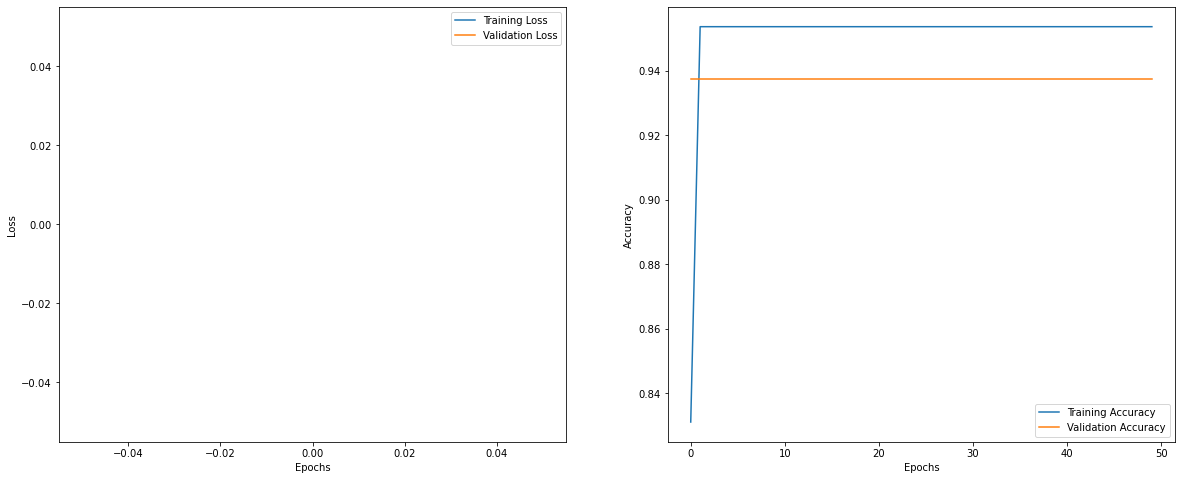

In [11]:
# Plot a graph of the metric vs. epochs.
plot_curve(hist)